##### Healthcare Data Analyst: Reuben Yohanna Vandi

--------------------------------------------------------------------------------------------------------------------------

# Analyzing the Impact of Physical Activity and Body Composition on Cardiorespiratory Fitness

## Problem Statement:
Despite growing awareness of lifestyle-related health risks, many individuals still suffer from poor cardiorespiratory fitness (CRF), a key predictor of chronic disease and mortality. This project explores how physical activity, body composition (height and weight), and other factors influence VO2 max levels. The goal is to identify patterns and risk indicators to support better health decisions and preventive care.

----------------------------------------------------------------------------------------------------------------------------

## Objectives:

1. Are there notable differences in fitness levels and health indicators between males and females?

2. Does engaging in regular physical exercise lead to significantly better fitness levels and overall health outcomes compared to not exercising?

3. Is there a meaningful correlation between mental health and physical health scores among individuals?

4. What is the relationship between Body Mass Index (BMI) and cardiorespiratory fitness (VO₂ Max)?

5. How do physical health scores vary across different BMI classifications (underweight, normal, overweight, obese)?

6. Is there an association between gender and the likelihood of engaging in regular physical exercise?
--------------------------------------------------------------------------------------------------------------------------

 ## Step by Step Data Analysis Workflow:
1. Data Collection: Load dataset from Excel into analysis tool
 
2. Data Exploration: View column names, data types, and to use summary functions like describe, with the purpose to understand what the data looks like and spot patterns or anomalies.
 
3. Data Cleaning: Handle missing values (drop, fill, or impute), fix incorrect data types, remove duplicates or unrealistic values with the purpose to improve data quality to ensure accurate analysis.
 
4. Feature Engineering: Create new variables, convert categorical variables if needed (e.g label encoding for chi-square), with the purpose to add useful information that can improve insights or predictions.

5. Descriptive Statistics (Univariate & Bivariate): Calculate means, medians, ranges, and standard deviations. Group by Gender or ExerciseReg and compare VO₂ max and to Visualize, with the purpose to summarize and compare variables to describe the population.

6. Inferential Statistics (Hypothesis Testing): T-tests, ANOVA, correlation analysis, report p-values and statistical significance, with the purpose to determine whether observed patterns are likely real or due to chance.

8. Interpretation of Results: Translate statistical findings into plain language, highlight key relationships and surprising discoveries, with the purpose to make the data meaningful to non-technical stakeholders.

### Data Collection
This is the first step where we load the dataset (Excel file) into a Jupyter Notebook, so we can begin working with it. Without this, no analysis is possible.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r"C:\Users\Reuben Yohanna Vandi\Documents\Research Ana with Python\Research  Analysis SPSS & Excel\materials\healthcare_dataset.xlsx", index_col='ID')
df

,Gender,Height,Weight,MH_Score,ExerciseReg,vo2max
ID,,,,,,
15,Male,1.62,43.27,37.48,Exercise Regularly,48.33
61,Male,1.62,43.72,32.86,Exercise Regularly,52.32
30,Female,1.56,41.73,43.58,Exercise Regularly,46.31
77,Male,1.62,47.28,38.65,Exercise Regularly,56.60
38,Female,1.52,42.04,38.26,Exercise Regularly,52.08
...,...,...,...,...,...,...
5,Female,1.52,66.02,44.71,Doesn't Exercise Regularly,55.47
35,Male,1.55,64.11,37.86,Doesn't Exercise Regularly,48.23
5,Male,1.54,82.96,48.35,Exercise Regularly,37.79


### Data Exploration
Here, we take a quick tour of the data. We examine data types, summarize the data to understand trends, detect outliers and irregularities, and identify null and duplicate values.

In [3]:
df.shape

(100, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 15 to 55
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       96 non-null     object 
 1   Height       99 non-null     float64
 2   Weight       98 non-null     float64
 3   MH_Score     99 non-null     float64
 4   ExerciseReg  100 non-null    object 
 5   vo2max       100 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.5+ KB


In [5]:
#Total sum of NULL values
df.isnull().sum()

Gender         4
Height         1
Weight         2
MH_Score       1
ExerciseReg    0
vo2max         0
dtype: int64

In [6]:
df.duplicated()

ID
15    False
61    False
30    False
77    False
38    False
      ...  
5     False
35    False
5     False
45    False
55    False
Length: 100, dtype: bool

In [7]:
#Detecting Outliers in Numerical Columns Using IQR (Interquartile Range)

numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {len(outliers)} outliers")

Height: 0 outliers
Weight: 0 outliers
MH_Score: 0 outliers
vo2max: 0 outliers


### Data Cleaning
Real world data often contains issues like missing values, incorrect entries, or duplicates. Cleaning the data ensures our results are based on accurate and complete information by addressing null values, duplicate values, outliers, and irregularities.

In [8]:
#Addressing NULL values

columns = df.columns

for col in columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        # For non-numeric columns, fill with the most frequent value (mode)
        df[col] = df[col].fillna(df[col].mode()[0])
df.isnull().sum()

Gender         0
Height         0
Weight         0
MH_Score       0
ExerciseReg    0
vo2max         0
dtype: int64

### Feature Engineering 
This step involves creating new, informative variables and transforming categorical variables. This process enhances the data's utility and prepares it for deeper analysis or prediction.

In [9]:
# Add a new column for BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

     # Create BMI categories
# Define the boundaries for the BMI groups
bins = [0, 18.5, 24.9, 29.9, np.inf]

# Define labels for each group
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Add a new column for BMI group
df['BMI_Group'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Check the result
df.head()

,Gender,Height,Weight,MH_Score,ExerciseReg,vo2max,BMI,BMI_Group
ID,,,,,,,,
15,Male,1.62,43.27,37.48,Exercise Regularly,48.33,16.487578,Underweight
61,Male,1.62,43.72,32.86,Exercise Regularly,52.32,16.659046,Underweight
30,Female,1.56,41.73,43.58,Exercise Regularly,46.31,17.147436,Underweight
77,Male,1.62,47.28,38.65,Exercise Regularly,56.60,18.015546,Underweight
38,Female,1.52,42.04,38.26,Exercise Regularly,52.08,18.195983,Underweight


In [10]:
le = LabelEncoder()
TransData = df.copy()
TransData['Gender_encoded'] = le.fit_transform(TransData['Gender'])
TransData['ExerciseReg_encoded'] = le.fit_transform(TransData['ExerciseReg'])
TransData = TransData.drop(['Gender', 'ExerciseReg'], axis=1)
TransData.head()

,Height,Weight,MH_Score,vo2max,BMI,BMI_Group,Gender_encoded,ExerciseReg_encoded
ID,,,,,,,,
15,1.62,43.27,37.48,48.33,16.487578,Underweight,1,1
61,1.62,43.72,32.86,52.32,16.659046,Underweight,1,1
30,1.56,41.73,43.58,46.31,17.147436,Underweight,0,1
77,1.62,47.28,38.65,56.60,18.015546,Underweight,1,1
38,1.52,42.04,38.26,52.08,18.195983,Underweight,0,1


### Descriptive Statistics (Univariate & Bivariate) 
We calculate summary statistics like mean, maximum, and minimum values for each column. Then, we compare groups, such as males vs females or exercisers vs non-exercisers. This helps us understand the data's characteristics and relationships.

In [11]:
# descriptive analysis of numerical columns
df.describe()

,Height,Weight,MH_Score,vo2max,BMI
count,100.00000,100.000000,100.000000,100.00000,100.000000
mean,1.65580,70.930200,39.342400,48.29970,26.088349
std,0.13316,17.797037,5.777419,8.54146,6.861838
min,1.45000,40.140000,30.510000,35.14000,13.559371
25%,1.54000,57.912500,34.125000,40.18250,20.385373
50%,1.63000,70.060000,39.100000,48.28000,25.960587
75%,1.78000,88.182500,44.445000,55.69750,30.953107
max,1.90000,99.870000,49.620000,63.78000,47.500595


In [12]:
# descriptive analysis of categorical columns: Gender
df['Gender'].value_counts()

Gender
Female    60
Male      40
Name: count, dtype: int64

In [13]:
# descriptive analysis of categorical columns: ExerciseReg
df['ExerciseReg'].value_counts()

ExerciseReg
Doesn't Exercise Regularly    52
Exercise Regularly            48
Name: count, dtype: int64

#### Bivariate Descriptive Analysis

In [14]:
# Height by Gender
df.groupby(['Gender']).agg(Avg_height = ('Height','mean'))

,Avg_height
Gender,
Female,1.638333
Male,1.682000


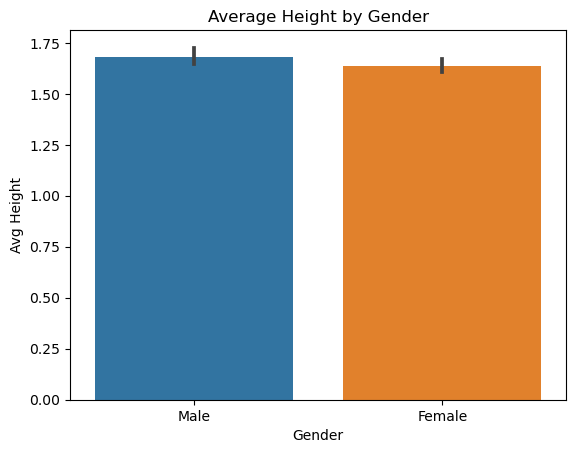

In [15]:
# Height by Gender barchart
sns.barplot(x='Gender', y='Height', data=df, estimator=np.mean)
plt.title("Average Height by Gender")
plt.ylabel("Avg Height")
plt.xlabel("Gender")
plt.show()

In [16]:
# Weight by Gender
df.groupby(['Gender']).agg(Avg_weight = ('Weight','mean'))

,Avg_weight
Gender,
Female,70.121667
Male,72.143000


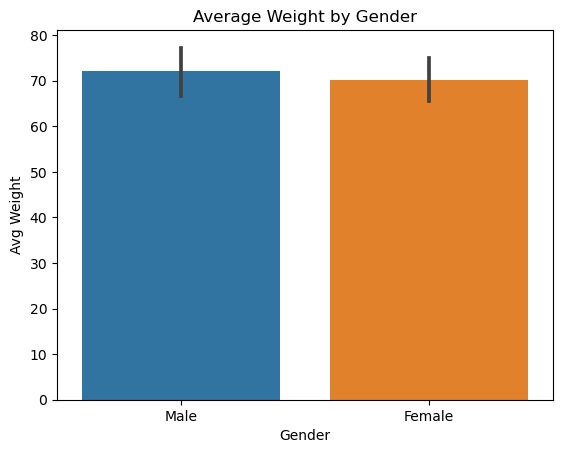

In [17]:
# Bar chart of average weight by gender
sns.barplot(x='Gender', y='Weight', data=df, estimator=np.mean)

# Add title and axis labels
plt.title('Average Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Weight')

# Show the plot
plt.show()

#### 1. Are there notable differences in fitness levels and health indicators between males and females?

In [18]:
# Mental health score by Gender
df.groupby(['Gender']).agg(mean_MHS = ('MH_Score','mean'))

,mean_MHS
Gender,
Female,39.607833
Male,38.944250


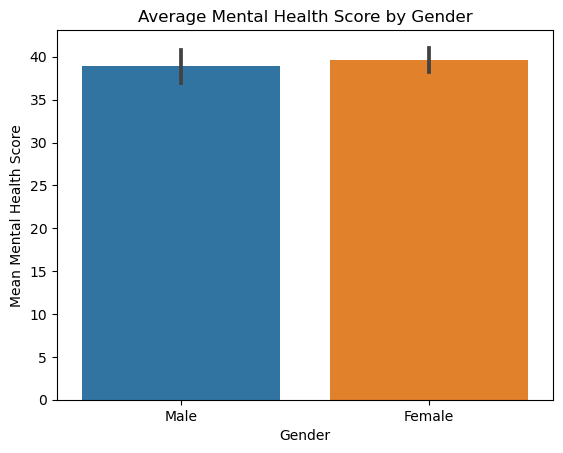

In [19]:
# Bar chart: Mental Health score by Gender
sns.barplot(x='Gender', y='MH_Score', data=df, estimator=np.mean)

# Add titles and labels
plt.title('Average Mental Health Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Mental Health Score')

# Show the plot
plt.show()

In [20]:
# Physical Health Score (PHS) by Gender
df.groupby(['Gender']).agg(mean_PHS = ('vo2max','mean'))

,mean_PHS
Gender,
Female,48.58500
Male,47.87175


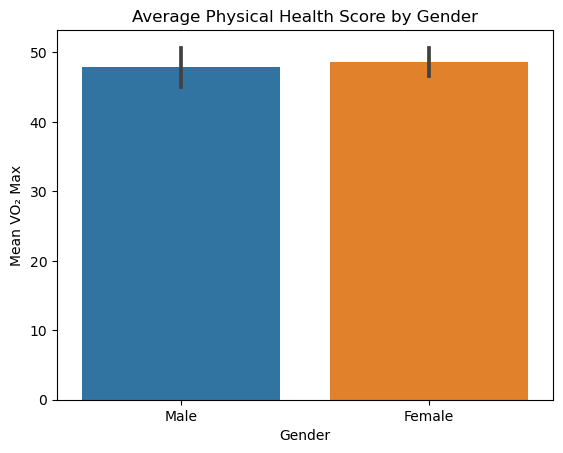

In [21]:
# Bar chart: Physical Health Score (vo2max) by Gender
sns.barplot(x='Gender', y='vo2max', data=df, estimator=np.mean)

# Add labels and title
plt.title('Average Physical Health Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean VO₂ Max')

plt.show()

#### 2. Does engaging in regular physical exercise lead to significantly better fitness levels and overall health outcomes compared to not exercising?

In [22]:
# Physical Health Score ("vo2max"-maximum amount of oxygen your body can use during intense exercise) by Exercise status
df.groupby(['ExerciseReg']).agg(mean_PHS = ('vo2max','mean'))

,mean_PHS
ExerciseReg,
Doesn't Exercise Regularly,47.363462
Exercise Regularly,49.313958


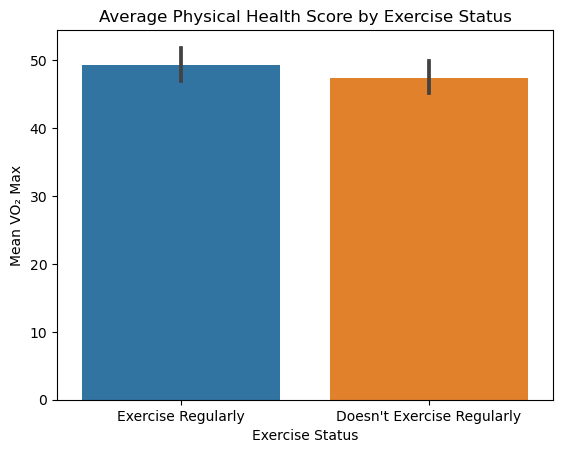

In [23]:
# Bar chart: Physical Health Score (VO2max) by Exercise Status
sns.barplot(x='ExerciseReg', y='vo2max', data=df, estimator=np.mean)

# Add labels and formatting
plt.title('Average Physical Health Score by Exercise Status')
plt.xlabel('Exercise Status')
plt.ylabel('Mean VO₂ Max')
plt.show()

In [24]:
# Mental Health Score by Exercise status
df.groupby(['ExerciseReg']).agg(mean_MHS = ('MH_Score','mean'))

,mean_MHS
ExerciseReg,
Doesn't Exercise Regularly,39.695192
Exercise Regularly,38.960208


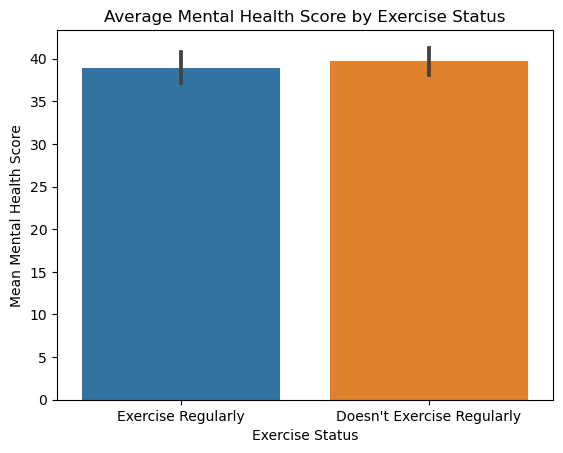

In [25]:
# Bar chart: Mental Health Score by Exercise Status
sns.barplot(x='ExerciseReg', y='MH_Score', data=df, estimator=np.mean)

# Add labels and title
plt.title('Average Mental Health Score by Exercise Status')
plt.xlabel('Exercise Status')
plt.ylabel('Mean Mental Health Score')

plt.show()

### Inferential Statistics (Hypothesis Testing)
We test whether observed patterns are statistically significant or due to chance. Using statistical tools like t-tests or correlation tests, we determine the likelihood of these patterns being real, giving us confidence in our findings.

#### Research Question 3. Is there a meaningful correlation between mental health (MH_Score) and physical health scores (VO2max) among individuals?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


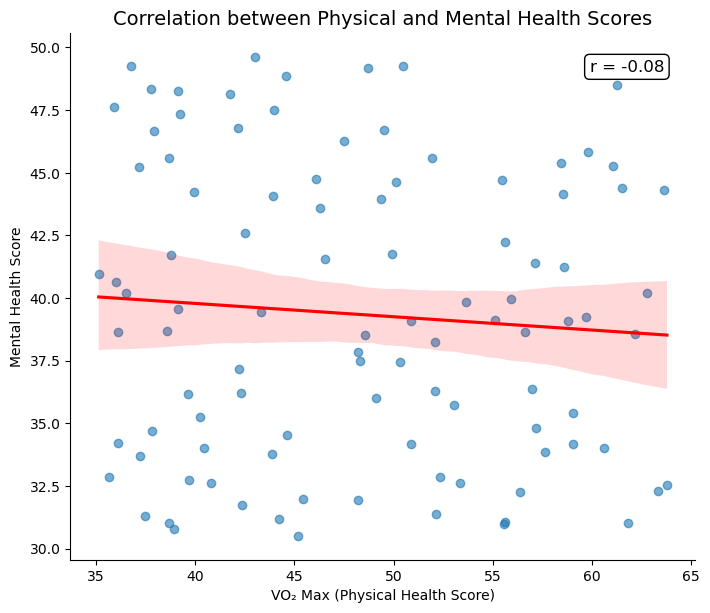

In [26]:
# Calculate correlation coefficient
corr = df['vo2max'].corr(df['MH_Score'])

# Create the scatter plot with regression line
plot = sns.lmplot(x='vo2max', y='MH_Score', data=df, 
    height=6,     
    aspect=1.2,   
    line_kws={"color": "red"},  
    scatter_kws={"alpha": 0.6})

# Get the Axes object from the FacetGrid
ax = plot.ax

# Annotate the correlation coefficient at the top-right corner
ax.annotate(
    f'r = {corr:.2f}',
    xy=(0.95, 0.95),           # x=95%, y=95% of axis size
    xycoords='axes fraction', # relative positioning
    ha='right', 
    va='top',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Add titles and labels
ax.set_title("Correlation between Physical and Mental Health Scores", fontsize=14)
ax.set_xlabel("VO₂ Max (Physical Health Score)")
ax.set_ylabel("Mental Health Score")

plt.show()

This chart explores the relationship between physical fitness (VO₂ Max) and mental health scores. The correlation coefficient is -0.08, which indicates a very weak negative relationship. In simple terms, there is no meaningful connection between a person’s level of physical fitness and their reported mental health score in this dataset.

This means that, based on the current data, improvements in physical health do not appear to be strongly associated with better or worse mental well-being. Other factors beyond physical fitness may have a greater influence on mental health in this group.

In [27]:
#check for normality for mental health score (MH)
from scipy.stats import shapiro

stat, p = shapiro(df['MH_Score'])
print(f"Shapiro-Wilk Test for MH: stat={stat:.3f}, p={p:.3f}")

if p > 0.05:
    print("Data appears normally distributed (fail to reject H0)")
else:
    print("Data does not appear normally distributed (reject H0)")

Shapiro-Wilk Test for MH: stat=0.941, p=0.000
Data does not appear normally distributed (reject H0)


In [28]:
#check for normality for physical health score (vo2max)
from scipy.stats import shapiro

stat, p = shapiro(df['vo2max'])
print(f"Shapiro-Wilk Test for physical health score: stat={stat:.3f}, p={p:.3f}")

if p > 0.05:
    print("Data appears normally distributed (fail to reject H0)")
else:
    print("Data does not appear normally distributed (reject H0)")

Shapiro-Wilk Test for physical health score: stat=0.942, p=0.000
Data does not appear normally distributed (reject H0)


Both variables are not normaly distributed, and both doesn't have outliers therefore pearson's correlation can be used to check for the relationship between the two variables

In [29]:
from scipy.stats import spearmanr

# Calculate Spearmans rank correlation
corr, p_value =spearmanr(df['MH_Score'], df['vo2max'])

# Print results
print(f"Spearmans rank correlation: r = {corr:.3f}, p-value = {p_value:.3f}")

Spearmans rank correlation: r = -0.081, p-value = 0.421


r = -0.089 means there's a weak negative correlation between mental health score and physical health score p = 0.378 means the correlation is not statistically significant.

Conclusion: There's a non significant weak negative correlation between mental health score and physical health score

#### Research Question 4. What is the relationship between Body Mass Index (BMI) and cardiorespiratory fitness (VO₂ Max)?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


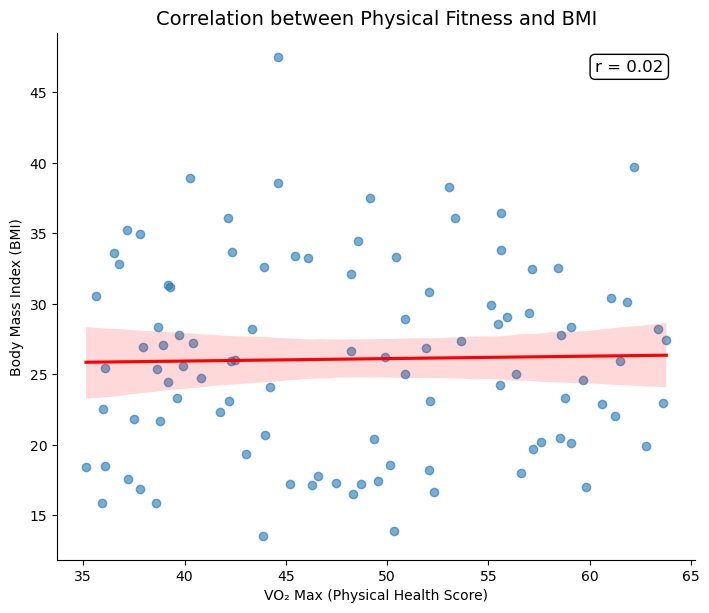

In [30]:
# Calculate correlation coefficient
corr = df['vo2max'].corr(df['BMI'])

# Create scatter plot with regression line
plot = sns.lmplot(
    x='vo2max', 
    y='BMI', 
    data=df, 
    height=6,     
    aspect=1.2,   
    line_kws={"color": "red"},  
    scatter_kws={"alpha": 0.6})

# Get Axes from the lmplot FacetGrid
ax = plot.ax

# Annotate correlation coefficient
ax.annotate(
    f'r = {corr:.2f}',
    xy=(0.95, 0.95),
    xycoords='axes fraction',
    ha='right',
    va='top',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Add plot labels
ax.set_title("Correlation between Physical Fitness and BMI", fontsize=14)
ax.set_xlabel("VO₂ Max (Physical Health Score)")
ax.set_ylabel("Body Mass Index (BMI)")

plt.show()

This chart explores the relationship between physical fitness (VO₂ Max) and body weight (BMI). The correlation result is r = 0.02, which indicates an almost zero relationship between the two variables in this dataset.

In simple terms, individuals with higher physical fitness levels do not consistently have higher or lower BMI values. This suggests that within this group, BMI and fitness score are not strongly linked, and other factors such as muscle mass, diet, or body composition may be more relevant to BMI than cardiovascular fitness alone.

This finding reminds us that BMI doesn't always tell the full story about a person's health or fitness level.





####  Research Question 5. How do physical health scores (VO₂ max) vary across different BMI classifications (underweight, normal, overweight, obese)?

Analyzing how BMI Groups affects VO₂ max.

Hypotheses:

•	H₀: There is no significant difference between BMI Group and VO₂ max.

•	H₁: There is a significant difference between BMI Group and VO₂ max.

In [31]:
#check for normality
from scipy.stats import shapiro

for group in df['BMI_Group'].unique():
    subset = df[df['BMI_Group'] == group]['vo2max']
    
    stat, p = shapiro(subset)
    print(f"{group} - Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")
    
    if p > 0.05:
        print("  Data appear normally distributed (fail to reject H0)\n")
    else:
        print("  Data does not appear normally distributed (reject H0)\n")

Underweight - Shapiro-Wilk Test: stat=0.943, p=0.303
  Data appear normally distributed (fail to reject H0)

Normal - Shapiro-Wilk Test: stat=0.895, p=0.014
  Data does not appear normally distributed (reject H0)

Obese - Shapiro-Wilk Test: stat=0.948, p=0.147
  Data appear normally distributed (fail to reject H0)

Overweight - Shapiro-Wilk Test: stat=0.919, p=0.043
  Data does not appear normally distributed (reject H0)



In [32]:
from scipy.stats import kruskal

# Split vo2max by BMI group
underweight = df[df['BMI_Group'] == 'Underweight']['vo2max']
normal = df[df['BMI_Group'] == 'Normal']['vo2max']
overweight = df[df['BMI_Group'] == 'Overweight']['vo2max']
obese = df[df['BMI_Group'] == 'Obese']['vo2max']

# Run Kruskal-Wallis test
h_stat, p_value = kruskal(underweight, normal, overweight, obese)

# Print the results
print(f"H-statistic: {h_stat:.3f}, p-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in VO2Max across BMI groups.")
else:
    print("There is no significant difference in VO2Max across BMI groups.")

H-statistic: 3.371, p-value: 0.3379
There is no significant difference in VO2Max across BMI groups.


####  Research Question 7. Is there an association between gender and the likelihood of engaging in regular physical exercise?

H0: There's no significant association between Regular exercise and Gneder

H1: There's significant association between Regular exercise and Gneder

In [33]:
from scipy.stats import chi2_contingency

# Create the contingency table for Regular Exercise vs Gender
contingency_table = pd.crosstab(df['ExerciseReg'], df['Gender'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-square test statistic = {chi2_stat:.3f}")
print(f"p-value = {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print(" There is a significant association between Regular Exercise and Gender (reject H0).")
else:
    print(" There is no significant association between Regular Exercise and Gender (fail to reject H0).")

Contingency Table:
Gender                      Female  Male
ExerciseReg                             
Doesn't Exercise Regularly      30    22
Exercise Regularly              30    18

Chi-square test statistic = 0.082
p-value = 0.775
 There is no significant association between Regular Exercise and Gender (fail to reject H0).


### Interpretation of Results

This analysis explored how physical activity, body composition (such as height and weight), and basic demographics (like gender) relate to cardiorespiratory fitness, using VO₂ Max as the primary indicator. We also investigated potential patterns in mental and physical health scores across gender, exercise habits, and BMI classifications.

##### Gender, Exercise, and Health Overview
Among the 100 individuals analyzed, 60 were female and 40 were male. Exercise participation was nearly even: 48% exercised regularly while 52% did not. On average, males were slightly taller and heavier than females. Interestingly, females recorded marginally higher mental health and VO₂ Max (physical health) scores than males. Those who exercised regularly also had better physical health scores (49.3) than those who didn’t (47.4), confirming a general benefit of physical activity.

Although regular exercisers had slightly lower mental health scores, the difference was small and could be due to stress or unrelated life factors. Overall, the data suggests that physical activity supports cardiovascular health across both genders.

##### Mental and Physical Health Relationship
We examined the connection between mental and physical health using correlation analysis. The result showed a weak negative correlation (r = -0.089), and the p-value (0.378) indicated that the relationship was not statistically significant. In simple terms, people who score high on physical health do not necessarily have higher mental health scores. The two aspects seem to be independent in this group.

##### BMI and Fitness Relationship
Another common belief is that people with a healthier body weight (BMI) also have better fitness levels. However, the analysis found an almost zero correlation between BMI and VO₂ Max (r = 0.02). This means that BMI alone cannot predict cardiorespiratory fitness — two people with the same BMI may have very different fitness levels.

Using group comparisons (Kruskal-Wallis test), we also found no statistically significant difference in VO₂ Max across different BMI groups (underweight, normal, overweight, obese). This reinforces that BMI is a limited indicator for understanding true physical fitness.

##### Gender and Exercise Habits
To determine if exercise habits vary by gender, we used a Chi-square test. The result was not significant (p = 0.775), showing that both males and females were equally likely to exercise or not. Gender does not play a role in predicting who exercises regularly in this sample.

### Recommendations
##### Shift focus from BMI to functional fitness (VO₂ Max):
BMI is easy to calculate but limited in what it reveals about health. Encouraging VO₂ Max assessments can offer more useful insights into an individual’s true physical condition.

##### Promote regular exercise across all populations:
Since both males and females benefit from exercise and are equally likely to participate, design inclusive fitness campaigns that remove stigma and stereotypes. Workplace and community health programs should prioritize accessibility and personalization.

##### Separate mental and physical health strategies:
Do not assume physical health improvements will solve mental health challenges. Health interventions must include dedicated mental health support, such as counseling, stress management workshops, and social support systems.

##### Use individualized health metrics over broad assumptions:
Avoid generalizing based on BMI, gender, or body type. Adopt a personalized health model where each person’s lifestyle, health scores, and behavior are used to guide decisions, particularly in clinical or occupational health settings.

##### Educate the public and health workers about fitness misconceptions:
Many still assume that being slim means being fit. Awareness campaigns should focus on aerobic capacity, stamina, and heart health rather than appearance alone.

### Final Conclusion
This analysis underscores that cardiorespiratory fitness and overall well-being cannot be accurately judged by appearance or weight alone. VO₂ Max is a much more meaningful indicator of physical health, yet it is underused in community health assessment. Furthermore, mental and physical health do not always align, and each needs targeted strategies for improvement.

Health promotion policies and clinical interventions should focus on:

* Encouraging physical activity for everyone,

* De-emphasizing BMI as a primary measure of health, and

* Treating mental and physical health separately but equally.

* By applying these findings, healthcare providers, wellness coordinators, and public health leaders can design more equitable, evidence-based, and effective programs that address real health needs rather than outdated assumptions.